# Projeto Final - T319 (1S2024)

### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção para anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão consideradas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Questões copiadas de outros grupos serão anuladas em todos os grupos com a mesma resposta.
7. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Coloque os nomes dos integrantes do grupo no campo de texto abaixo.
8. Você pode consultar todo o material de aula e laboratórios.
9. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
10. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

## Exercícios

### 1) Exercício sobre a escolha do passo de aprendizagem




1. Execute a célula de código abaixo para importar as bibliotecas necessárias e definir algumas funções necessárias para o treinamento de um modelo de regressão linear.

**DICAS**

+ A função `gradientDescent` implementa a versão estocástica do gradiente descendente.
+ Note que a função `gradientDescent` utiliza **decaimento temporal** do passo de aprendizagem para tornar o aprendizado do algoritmo mais comportado.

In [1]:
# Import all necessary libraries.
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Reseta os gerados de sequências pseudo-aleatórias.
seed = 42
np.random.seed(seed)
random.seed(seed)

def calculateErrorSurface(x, y):
    """Generate data points for plotting the error surface."""

    # Retrieve number of examples.
    N = len(y)

    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-3.1, -2.9, M)
    a2 = np.linspace(-2.1, -1.9, M)

    # Generate matrices with combinations between a1 and a2 values.
    A0, A1 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A0[iter1, iter2] + A1[iter1, iter2]*x
            # Calculate the mean squared error (MSE) for each pair of values.
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

    return J, A0, A1

def timeBasedDecay(alpha_init, k, t):
    '''Decaimento temporal.'''
    return alpha_init / (1.0 + k*t)

def gradientDescent(X, y, n_epochs, alpha_init, k):
    '''
    Função que implementa a versão estocástica do gradiente descendente.
    Os parâmetros de entrada da função são:
    * X          - Matriz de atributos
    * y          - vetor de rótulos
    * n_epochs   - número máximo de épocas de treinamento
    * alpha_init - valor inicial do passo de aprendizagem
    * k          - taxa de decaimento da redução temporal do passo de aprendizagem
    '''

    # Number of examples.
    N = len(y)
    
    # Reshape y to be a column vector.
    y = y.reshape(N,1)
    
    # Inicialização do vetor de pesos.
    a = np.array([-5.0, -4.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*N+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create vector to store eta history.
    alpha_hist = np.zeros((n_epochs*N))

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*N+1)

    # Calcule o MSE para o primeiro conjunto de pesos.
    Jgd[0] = (1.0/N)*np.sum(np.power(y - X.dot(a), 2))

    # Cria arrays para armazenar vetores de atualização e gradiente.
    update_hist = np.zeros((2, n_epochs*N))
    gradient_hist = np.zeros((2, n_epochs*N))

    # Stocastic gradient-descent loop.
    iteration = 0
    # Época de treinamento, apresenta todas os exemplos de treinamento ao modelo.
    for epoch in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)    

        # Iteração de treinamento, apenas um exemplo é apresentado ao modelo.
        for i in range(N):
            # Retrieve one pair of atribute vector and label.
            random_index = shuffled_data_set_indexes[i]
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Decaimento temporal do passo de aprendizagem.
            alpha = timeBasedDecay(alpha_init, k, epoch*N + i)

            # Cálculo da estimativa do vetor gradiente com apenas uma amostra.
            gradient = -2.0*xi.T.dot(yi - xi.dot(a))
            update = alpha*gradient
            a = a - update

            # Armazena o histórico de valores.
            a_hist[:, epoch*N+i+1] = a.reshape(2,)
            alpha_hist[epoch*N+i] = alpha
            update_hist[:, epoch*N+i] = update.reshape(2,)
            gradient_hist[:, epoch*N+i] = gradient.reshape(2,)

            # Calcula o MSE por itereção de treinamento.
            Jgd[epoch*N+i+1] = (1.0/N)*np.sum(np.power((y - X.dot(a)), 2))
            
            # Incrementa o contador de iterações.
            iteration = epoch*N+i
            
    return a, Jgd, a_hist, alpha_hist, update_hist, gradient_hist, iteration

2. Execute a célula de código abaixo para criar o conjunto de dados que será usado neste exercício.

+ A função objetivo utilizada neste exercício é dada por $y = -3 + -2x$, onde $a_0=-3$ e $a_1=-2$.
+ A função hipótese que utilizaremos tem o mesmo formato da função objetivo, $\hat{y} = \hat{a}_0 + \hat{a}_1 x$, sendo o objetivo do algoritmo do gradiente descendente encontrar aproximações, $\hat{a}_0$ e $\hat{a}_1$, para os valores de ${a}_0$ e ${a}_1$.
+ Para representarmos a função hipótese em formato matricial, i.e., $\textbf{y} = \textbf{X}\textbf{a}$, precisamos criar a matriz de atributos concatenando os vetores de atributos de *bias* (i.e., vetor com valores iguais a 1) e $x$.

**DICAS**

+ Na célula de código abaixo, o vetor do atributo de *bias* é concatenado ao vetor de atributo, $x$.
+ Essa concatenação é feita de forma manual, pois a implementação da versão estocática do gradiente descendente fornecida acima não faz isso automaticamente como no caso das classes fornecidas pela bilbioteca SciKit-Learn.

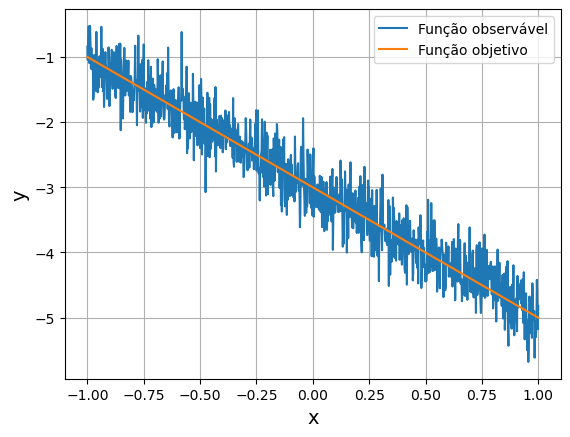

In [2]:
# Número de amostras
N = 1000

# Vetor de atributos.
x = np.linspace(-1, 1, N).reshape(N, 1)

# Função objetivo.
y = -3 + -2*x

# Ruído.
w = np.sqrt(0.1)*np.random.randn(N, 1)

# Função observável.
y_noisy = y + w

# Cria matriz de atributos.
X = np.c_[np.ones((N, 1)), x]

# Figura comparando as duas funções.
plt.plot(x, y_noisy, label='Função observável')
plt.plot(x, y, label='Função objetivo')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.legend()
plt.show()

3. Analise a geração das amostras da função observável no item anterior, qual é o menor erro (i.e., Erro quadrático médio - EQM) possível com um regressor linear treinado com essas amostras?

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

4. Divida o conjunto total de amostras em conjuntos de treinamento e validação. O conjunto de treinamento deve conter 75% do total de amostras e o conjunto de validação os 25% restantes.


**DICAS**

+ Use a função `train_test_split` e a configure com os seguintes parâmetros `test_size=0.25` e `random_state=seed`. A função divide o conjunto original de amostras em dois subconjuntos, um para treinamento e outro para validação (i.e., para avaliar a capacidade de generalização do modelo). Veja o código abaixo.
```python
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.25, random_state=seed)
```
+ Para que o próximo item do exercício funcione, chame as matrizes de treinamento e de validação de `X_train` e `X_test`, respectivamente, e os vetores de rótulos de treinamento e de validação de `y_train` e `y_test`, respectivamente, como no exemplo acima.

In [1]:
# Digite o código do exercício aqui. 

5. Execute a célula de código abaixo e analise as figuras.

A célula abaixo treina o modelo de regressão usando a função `gradientDescent` com os seguintes valores: 
+ **taxa de decaimento ($k$)**: 0.1, 0.01, e 0.001.
+ **passo de aprendizagem ($\alpha$)**: 0.1, 0.03, 0.01, 0.003, e 0.001.

Cada figura mostra o erro de treinamento em função das iterações de treinamento para um valor específico da taxa de decaimento ($k$) e vários valores para o passo de aprendizagem ($\alpha$). O valor de taxa de decaimento ($k$) é mostrado no título (i.e., topo) da figura, enquanto os diferentes valores de passo de aprendizagem ($\alpha$) são mostrados com cores diferentes na legenda de cada figura.

**DICA**:

+ Lembrem-se que o menor valor do EQM tende ao valor da variância do ruído adicionado às amostras da função objetivo quando encontra-se os valores ótimos dos pesos.

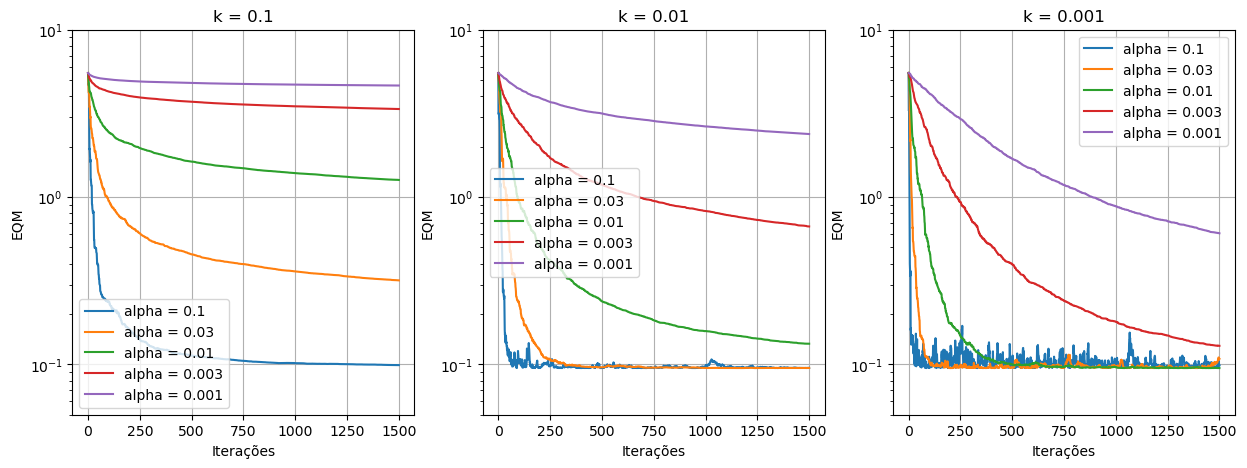

In [4]:
# Número de épocas.
n_epochs = 2
# Lista de taxas de decaimento.
k_list = [0.1, 0.01, 0.001]
# Lista de passos de aprendizagem.
alpha_list = [0.1, 0.03, 0.01, 0.003, 0.001]

# Lista para armazenar os erros das combinações de taxa de decaimento e passo de aprendizagem.
error = []
for k in k_list:
    error_hist = []
    for alpha in alpha_list:
        a, Jgd, a_hist, alpha_hist, update_hist, gradient_hist, iteration = gradientDescent(X_train, y_train, n_epochs, alpha_init=alpha, k=k)
        error_hist.append(Jgd)
    error.append(error_hist)

# Visualização do erro durante o treinamento de cada passo de aprendizagem.
plt.figure(figsize=(15,5))
for i in range(len(k_list)):
    plt.subplot(1, 3, i+1)
    plt.title('k = '+str(k_list[i]))
    for j in range(len(alpha_list)):
        plt.plot(np.arange(error[i][j].shape[0]), error[i][j], label=('alpha = '+f'{alpha_list[j]}'))
        plt.yscale('log')
    plt.xlabel('Iterações')
    plt.ylabel('EQM')
    plt.legend()
    plt.legend()
    plt.grid()
    plt.ylim([0.05, 10])
plt.show()

6. Analise as figuras do item anterior e responda: Quais são os valores ideais para a taxa de decaimento ($k$) e o passo de aprendizagem ($\alpha$)? (**Justifique sua resposta**).

**DICA**

+ A ideia é que o aprendizado seja rápido, ou seja, convirja rapidamente (erro praticamente constante), mas sem muita oscilação no erro.

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

7. De posse dos valores ideais para a taxa de decaimento ($k$) e passo de aprendizagem ($\alpha$), treine novamente o modelo com estes valores e imprima os erros quadráticos médios (EQMs) obtidos para os conjuntos de treinamento de validação e o valor dos pesos $\hat{a}_0$ e $\hat{a}_1$.
 
**DICAS**

+ Configure a função `gradientDescent` com os melhores valores para a taxa de decaimento ($k$) e passo de aprendizagem ($\alpha$) obtidos no item anterior.
+ Os parâmetros de entrada da função `gradientDescent` são descritos em seu cabeçalho. Veja a definição da função.
+ Treine o modelo com o conjunto de treinamento.
+ Configure o **número de épocas**, `n_epochs`, com o valor `2`, ou seja, o modelo será treinado por 2 épocas.
+ Lembre-se que a função hipótese é expressa no formato vetorial como $\hat{\textbf{y}}=\textbf{X}\textbf{a}$, onde $\textbf{X}$ é a matriz de atributos e $\textbf{a}$ é o vetor de pesos. Portanto, para fazer predições com as matrizes de atributos de treinamento e validação, você precisa utilizar a função hipótese no formato vetorial.
+ Você pode usar a função `mean_squared_error` da biblioteca SciKit-Learn para calcular o EQM.

In [2]:
# Digite o código do exercício aqui.

8. Treine um modelo usando a **equação normal** (i.e., a equação que dá a solução ótima para o conjunto de treinamento fornecido). Ao final, imprima o erro quadrático médio (EQM) obtido pelo modelo para os conjuntos de treinamento e validação. Além disso, imprima o valor dos pesos $\hat{a}_0$ e $\hat{a}_1$ obtidos com a **equação normal**.

**DICAS**

+ Você pode utilizar a classe `LinearRegression` da biblioteca SciKit-Learn para resolver este item ou implementar a equação normal manualmente.
+ Caso você use a classe `LinearRegression`, a configure com o parâmetro `fit_intercept=False`, pois a matriz de atributos criada no item 2 do exercício, já contém a coluna do atributos de bias, ou seja, a coluna com todos os valores iguais a 1.
+ Usando a classe `LinearRegression`:
  * A predição é feita com o método `predict()`.
  * Os pesos do modelo podem ser acessados através do atributo `coef_` da classe `LinearRegression`. Por exemplo, dado que o nome do objeto da classe `LinearRegression` é `reg`, então `reg.coef_[0,0]` acessa o valor ótimo encontrado para o peso $\hat{a}_0$ e `reg.coef_[0,1]` acessa o valor ótimo encontrado para o peso $\hat{a}_1$.
+ Você pode usar a função `mean_squared_error` da biblioteca SciKit-Learn para calcular o EQM.

In [3]:
# Digite o código do exercício aqui. 

9. Compare os pesos ($\hat{a}_0$ e $\hat{a}_1$) e os erros, i.e., EQMs, (para os conjuntos de treinamento e validação) obtidos com os modelos usando a equação normal (item 8) e o gradiente descendente estocástico com os melhores valores para a taxa de decaimento e passo de aprendizagem (item 7).

Os valores são diferentes? Se sim, explique o motivo da diferença. (**Justifique sua resposta**).

**DICAS**

+ Lembre-se que a equação normal dá a solução ótima, ou seja, ela fornece os pesos que minimizam o EQM. Não existem outros pesos que resultem em um EQM menor para o conjunto de treinamento usado.
+ As estimativas do vetor gradiente com o gradiente descendente estocástico, mesmo com os melhores valores para a taxa de decaimento e passo de aprendizagem, continuam sendo ruidosas, consequentemente, as atualizações dos pesos também serão ruidosas.
+ Além disso, os valores encontrados para a taxa de decaimento e passo de aprendizagem podem não ser os ótimos.
+ Reveja o material de aula e os exemplos onde discutimos as versões do gradiente descendente.

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

10. Plote a superfície de contorno desta função hipótese e mostre que os pesos encontrados com a equação normal e gradiente descendente são próximos, mas não idênticos.

**DICAS**

+ Use a função `calculateErrorSurface` definida no item 1 deste exercício.
+ Restrinja o eixo de $\hat{a}_0$ entre os valores $-3.1$ e $-2.9$.
+ Restrinja o eixo de $\hat{a}_1$ entre os valores $-2.1$ e $-1.9$.

In [4]:
# Digite o código do exercício aqui. 

### 2) Exercício sobre validação cruzada

Neste exercício, você irá utilizar uma estratégia de validação cruzada para encontrar a ordem ideal para uma função hipótese que será usada para aproximar um conjunto de dados ruidosos.

A **função observável** deste exercício é gerada utilizando-se a função `generateDataSet` do módulo `util_functions_aux`.

A **função hipótese** para este exercício é **polinomial** e tem a seguinte forma

$$h(n) = a_0 + a_1 x(n) + a_2 x(n)^2 + \cdots + a_M x(n)^M.$$

A tarefa aqui é encontrar o valor ideal para $M$, ou seja, a ordem da função hipótese polinomial de tal forma que ela consiga aproximar bem os dados observados.

**DICAS**:

+ Para gerar os valores de $x$, $y$ e $y_{noisy}$ use a função `generateDataSet` passando como parâmetro de entrada o número de matrícula de um dos alunos do grupo.
+ Para resolver as questões deste exercício, se baseie no código do seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/validacao_cruzada.ipynb).
+ Todas as funções usadas neste exercício estão definidas no arquivo `util_functions.py`, que se encontra na mesma pasta que este notebook. 
+ **SOB NENHUMA HIPÓTESE, ALTERE O ARQUIVO `util_functions_aux.py`**

1. Execute o trecho de código abaixo e analise os resultados gerados.

**DICA**

+ Não se esqueça de definir o número de matrícula de qualquer um dos integrantes do grupo na célula abaixo e executá-la a fim de atribuir o valor à variável `groupNumber`.

<span style="color:red">Atribua o número de matrícula de qualquer um dos integrantes do grupo à variável abaixo.</span>

In [16]:
groupNumber = XXXX

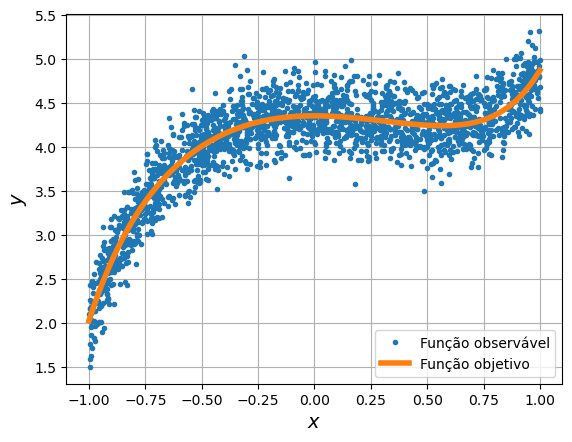

In [17]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import timeit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import urllib
urllib.request.urlretrieve('https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/projeto/util_functions.py', 'util_functions_aux.py')
import util_functions_aux as util

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Number of examples.
N = 2000

# Generate datase.
x, y, y_noisy = util.generateDatasetsv2(groupNumber, N)

# Plot comparison between true and noisy model.
plt.plot(x, y_noisy, '.', label='Função observável')
plt.plot(x, y, label='Função objetivo', linewidth=4)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()
plt.show()

2. Usando a estratégia de validação cruzada **k-Fold**, encontre a ordem ideal para que uma função hipótese polinomial aproxime bem o conjunto de dados gerado no item anterior. Para avaliar qual é a ordem ideal para o polinômio aproximador, plote gráficos com a média e o desvio padrão do erro quadrático médio (MSE) em função dos graus de polinômio considerados. Para isso:

   1. Use o **k-Fold** com **k** igual a 10.
   2. Configure o parâmetro `shuffle` da classe `KFold` como `True`, ou seja, `shuffle=True`.
   3. Faça a análise de polinômios de ordem 1 até 30, **inclusive**.
   4. Desabilite a inclusão da coluna do atributo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=False`.
   5. Use a classe `StandardScaler` para padronizar os atributos.

**DICAS** 

+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [5]:
# Digite o código do exercício aqui.

3. Após analisar os resultados obtidos com a validação cruzada **k-Fold**, responda qual é a melhor ordem de polinômio para aproximar os dados. **Justifique sua resposta.**

**DICA**

* Lembre-se do princípio da navalha de Occam para escolher a melhor ordem.

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

4. De posse da melhor ordem, treine um novo modelo de regressão considerando esta ordem e plote um gráfico que compare a função objetivo com as funções observável (i.e., ruidosa) e hipótese.

**DICAS**

+ Inclua o termo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=False`.
+ Use a classe `StandardScaler` para padronizar os atributos.
+ Use o conjunto total de amostras para calcular o erro.
+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [6]:
# Digite o código do exercício aqui.

5. O que aconteceria se a ordem do modelo aproximador fosse bem maior do que a que você escolheu (por exemplo, dez vezes maior)? **Justifique sua resposta.**

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

6. Escolha uma ordem bem maior do que a que você usou no item 4 (por exemplo, dez vezes maior) e apresente uma figura comparando a predição feita por esse modelo com ordem bem menor com os dados originais (amostras das funções objetivo e observável).

In [7]:
# Digite o código do exercício aqui.

7. O que aconteceria se a ordem do modelo aproximador fosse igual a 1, ou seja, uma reta? **Justifique sua resposta.**

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

8. Faça a ordem do modelo aproximador igual a 1 e apresente uma figura comparando a predição feita por esse modelo com ordem igual a 1 com os dados originais (amostras das funções objetivo e observável).

In [9]:
# Digite o código do exercício aqui.

### 3) Usando regressão para prever a qualidade de vinhos.

Neste exercício, você encontrará um modelo de regressão linear simples que, a partir das características fornecidas, determina a qualidade de um vinho dando uma nota de 0 a 10.

O conjunto de dados é constituído por 1599 exemplos contendo 11 variáveis de entrada (*atributos*) e 1 variável de saída (*rótulo*). Todas essas variáveis são descritas pela tabela abaixo. O rótulo é a qualidade (`quality`).

|   | Input variables (based on physicochemical tests) |
|:-:|:------------------------------------------------:|
| 1 |                  fixed acidity                   |
| 2 |                volatile acidity                  |
| 3 |                   citric acid                    |
| 4 |                 residual sugar                   |
| 5 |                    chlorides                     |
| 6 |                free sulfur dioxide               |
| 7 |                total sulfur dioxide              |
| 8 |                     density                      |
| 9 |                       pH                         |
| 10 |                    sulphates                    |
| 11 |                     alcohol                     |
|    |    **Output variable (based on sensory data)**  |
| 12 |          quality (score between 0 and 10)       |

Fonte dos dados: [Referência dos dados sobre vinho](https://archive.ics.uci.edu/ml/datasets/wine+quality)

1. Execute a célula de código abaixo para importar os dados e as bibliotecas necessárias.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas do arquivo.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define uma semente para inicializar os gerados pseudo-aleatórios.
seed = 42

# Importa os dados
df = pd.read_csv('https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/projeto/winequality-red.csv', sep=';')

# Mostra uma tabela com os 5 primeiros exemplos 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. Com os dados importados, execute a próxima célula para separar os atributos e os rótulos.

**DICAS**

+ A primeira linha de comando remove do conjunto atributos desnecessários à regressão.
+ A célula imprimirá as dimensões da matriz de atributos e do vetor de rótulos.

In [14]:
# Features/Atributos
X = df.drop('quality', axis=1)
print('Dimensão da matriz de atributos:', X.shape)

# Label/Rótulo
y = df['quality'].copy()
print('Dimensão da matriz de rótulos:', y.shape)

Dimensão da matriz de atributos: (1599, 11)
Dimensão da matriz de rótulos: (1599,)


3. Usando a estratégia de validação cruzada **k-Fold**, encontre a ordem ideal para que uma função hipótese polinomial aproxime bem o conjunto de dados. Para avaliar qual é a ordem ideal para o polinômio aproximador, plote gráficos com a média e o desvio padrão do erro quadrático médio (EQM) em função dos graus de polinômio considerados. Para isso:

   1. Use o **k-Fold** com **k** igual a 10.
   2. Configure o parâmetro `shuffle` da classe `KFold` como `True`, ou seja, `shuffle=True`.
   3. Faça a análise de polinômios de ordem 1 até 6, **inclusive**.
   4. Desabilite a inclusão da coluna do atributo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=False`.
   5. Use a classe `MinMaxScaler` para normalizar os atributos.

**DICAS** 

+ Crie um pipeline de ações com objetos das classes `PolynomialFeatures`,  `MinMaxScaler` e `LinearRegression`,.
+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [10]:
# Digite o código do exercício aqui.

4. Após analisar os resultados obtidos com a validação cruzada **k-Fold**, responda qual é a melhor ordem de polinômio para aproximar os dados. **Justifique sua resposta.**

**DICA**

* Lembre-se do princípio da navalha de Occam para escolher a melhor ordem.

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

5. Analisando os resultados obtidos com a validação cruzada **k-Fold**, o que aconteceria se a ordem do modelo de regressão polinomial fosse maior do que 3? **Justifique sua resposta.**

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>